In [ ]:
import numpy as np 
from sys import getsizeof
from typing import Dict, Tuple


In [ ]:
max_node = 0
node_labels = np.ones(max_node, dtype=int) * max_node
print( 'node-label',  round(getsizeof(node_labels) / 1024 / 1024 /1024 ,2) )

node_feature = np.ones((max_node, 300), dtype=float)
print( 'node-feat',  round(getsizeof(node_feature) / 1024 / 1024/ 1024,2) )

# edge_feature = np.ones((max_node*max_node*0.003, 300), dtype=int)
# print( 'node-feat',  round(getsizeof(node_labels) / 1024 / 1024,2) )


In [ ]:
round(getsizeof(node_labels) / 1024 / 1024,2)

In [ ]:
# sparse vector
round(getsizeof(node_labels) / 1024 / 1024 ,2)

In [ ]:
node_feature.shape

In [ ]:
np.empty(shape=(0),dtype=int)

In [ ]:
a = np.array([1,2,3], dtype=int)
np.hstack((a, np.nan))

In [ ]:
structure_events_dict: Dict[Tuple[int, int], int] = {}

In [ ]:
    # E = [
    #     (0,1,1,1,1),
    #     (0,2,1,1,1),
    #     (0,3,1,1,1),
    #     (0,4,1,1,1),
    #     ]
    # # new snapshot...
    # E_new = [
    #     [(0,2,1,1,1),(2,3,1,1,1)],
    # ]
    # snapshot_ppv = test_dynamic_ppr_batch_source(E, E_new)
    # print (snapshot_ppv)
    # print(f'Threading layer chosen: {numba.threading_layer()}' )



In [ ]:
a.fill(np.nan)

In [ ]:
a

In [ ]:
def aa(a:int, b:int, *args, **kwargs):
    # print('1', a,b)
    # print('2', args)
    # print('3', kwargs)
    pass
    
def bb(a:int, b:int, kwargs):
    print(kwargs)
    kwargs['a+b'] = a+b+2
    print('3', kwargs)
    return None
    

tmp_kwargs = {'1':99}

# aa(1,2, tmp_kwargs)
_ = bb(1,2, tmp_kwargs)

print(tmp_kwargs)

## Compare numba speed with nnz
### conclusion: input dense vector, output dense vector

In [ ]:
import numba as nb
import numpy as np 
import time
from numba.typed import Dict as nb_dict
from numba.core import types
import os
os.environ["NUMBA_CACHE_DIR"] = "/tmp"


def test_input_dense_vector_python(p_s: np.ndarray, r_s:np.ndarray, alpha: float, rand_order: np.ndarray):
    total = rand_order.shape[0]
    for _ in range(total):
        i = rand_order[_]
        p_s[i] = p_s[i] + p_s[i//2] + alpha* r_s[i]
    return p_s, p_s, r_s, r_s

@nb.njit(fastmath = True, parallel =True, nogil = True)
def test_input_dense_vector_numba(p_s: np.ndarray, r_s:np.ndarray, alpha: float, rand_order: np.ndarray):
    total = rand_order.shape[0]
    for _ in nb.prange(total):
        i = rand_order[_]
        p_s[i] = p_s[i] + p_s[i//2] + alpha* r_s[i]
    return p_s, p_s, r_s, r_s

@nb.njit(fastmath = True, parallel =True, nogil = True)
def test_input_dense_vector_numba_inplace(p_s: np.ndarray, r_s:np.ndarray, alpha: float, rand_order: np.ndarray):
    total = rand_order.shape[0]
    for _ in nb.prange(total):
        i = rand_order[_]
        p_s[i] = p_s[i] + p_s[i//2] + alpha* r_s[i]
    return None, None, None, None


@nb.njit(fastmath = True, parallel =True, nogil = True)
def test_input_dense_vector_numba_return_nnz_idx(p_s: np.ndarray, r_s:np.ndarray, alpha: float, rand_order: np.ndarray):
    total = rand_order.shape[0]
    for _ in nb.prange(total):
        i = rand_order[_]
        p_s[i] = p_s[i] + p_s[i//2] + alpha* r_s[i]
    # return sparse
    p_s_nnz_idx = np.nonzero(p_s)
    # p_s_nnz_val = p_s[p_s_nnz_idx]
    r_s_nnz_idx = np.nonzero(r_s)
    # r_s_nnz_val = r_s[r_s_nnz_idx]
    return p_s_nnz_idx, p_s_nnz_idx, r_s_nnz_idx, r_s_nnz_idx


@nb.njit(fastmath = True, parallel =True, nogil = True)
def test_input_dense_vector_numba_return_nnz_idx_val(p_s: np.ndarray, r_s:np.ndarray, alpha: float, rand_order: np.ndarray):
    total = rand_order.shape[0]
    for _ in nb.prange(total):
        i = rand_order[_]
        p_s[i] = p_s[i] + p_s[i//2] + alpha* r_s[i]
    # return sparse
    p_s_nnz_idx = np.nonzero(p_s)
    p_s_nnz_val = p_s[p_s_nnz_idx]
    r_s_nnz_idx = np.nonzero(r_s)
    r_s_nnz_val = r_s[r_s_nnz_idx]
    return p_s_nnz_idx, p_s_nnz_val, r_s_nnz_idx, r_s_nnz_val




In [ ]:

def test_speed(func):
    n = 1000000
    num_ops = 5000
    alpha = 0.2
    s = 3
    rand_order = np.random.choice(n, num_ops)
    repeat_time = 1000
    comsumed_time = []
    for _ in range(repeat_time):
        p_s = np.zeros(n, dtype=float)
        r_s = np.ones(n, dtype=float)
        # print(f'sum of ps {np.sum(p_s)}')
        start = time.perf_counter()
        p_s_nnz_idx, p_s_nnz_val, r_s_nnz_idx, r_s_nnz_val = func(p_s, r_s, alpha, rand_order)
        comsumed_time.append( time.perf_counter() - start)
        # print(f'sum of ps {np.sum(p_s)}')
    print(f'Testing: {func.__name__}: n: {n}, num_ops:{num_ops}')
    print(f'Speed per iter: {np.mean(comsumed_time)*1000} ms per with std {np.std(comsumed_time *1000)}')

test_speed(test_input_dense_vector_python)
test_speed(test_input_dense_vector_numba)
test_speed(test_input_dense_vector_numba_inplace)
test_speed(test_input_dense_vector_numba_return_nnz_idx)
test_speed(test_input_dense_vector_numba_return_nnz_idx_val)


"""
Testing: test_input_dense_vector_python: n: 1000000, num_ops:5000
Speed per iter: 4.179927775170654 ms per with std 0.0002740929690304788
Testing: test_input_dense_vector_numba: n: 1000000, num_ops:5000
Speed per iter: 0.1503849932923913 ms per with std 1.1700934376113088e-05
Testing: test_input_dense_vector_numba_inplace: n: 1000000, num_ops:5000
Speed per iter: 0.13864837167784572 ms per with std 2.006728684142806e-05
Testing: test_input_dense_vector_numba_return_nnz_idx: n: 1000000, num_ops:5000
Speed per iter: 2.5898508434183896 ms per with std 8.440914670536068e-05
Testing: test_input_dense_vector_numba_return_nnz_idx_val: n: 1000000, num_ops:5000
Speed per iter: 3.821231385692954 ms per with std 0.0002650383047438655
"""

In [ ]:

n = 2000
dict_p_arr = nb_dict.empty(key_type = types.int32, value_type = types.float32[:])
tracked_nodes = np.arange(1,10, dtype=np.int32)
print(tracked_nodes)

@nb.njit(nogil = True)
def test_numba_dict_ndarray(dict_p_arr, tracked_nodes, n):
    _ = tracked_nodes.shape[0]
    for i in nb.prange(_):
        dict_p_arr[i] = np.ones(n, dtype = np.float32)
    print(dict_p_arr, tracked_nodes)
    
print(test_numba_dict_ndarray(dict_p_arr, tracked_nodes, n))
print(dict_p_arr)

In [ ]:

# @nb.njit(nogil = True, parallel = True)
@nb.njit(nogil = True, parallel = True, fastmath = True)
def change_val_multithread(num_ops, total_n, dim, nb_dict):
    for i in nb.prange(total_n):
        for j in nb.prange(dim):
            for _ in range(num_ops): 
                nb_dict[i][j] = nb_dict[i][j] + nb_dict[i][j//2]

def test_multithread():
    n = 200
    dim = 3000
    num_ops = 100
    dict_p_arr = nb_dict.empty(key_type = types.int32, value_type = types.float32[:])
    for _ in np.arange(n, dtype=np.int32):
        dict_p_arr[_] = np.ones( dim,dtype=np.float32)
    change_val_multithread(num_ops, n, dim, dict_p_arr)
    return dict_p_arr

dict_p_arr = test_multithread()

In [ ]:
# @nb.njit(nogil = True, parallel = True, fastmath = True)
def set_val_multithread(num_ops, total_n, dim, nb_dict):
    for i in nb.prange(total_n):
        visit_set = set()
        for j in range(dim):
            for _ in range(num_ops): 
                if j not in visit_set:
                    visit_set.add(j)
                    nb_dict[i][j] = nb_dict[i][j]*1.87 + nb_dict[i][j//2]
                    visit_set.add(nb_dict[i][j])

def test_set_val_multithread():
    n = 200
    dim = 3000
    num_ops = 100
    dict_p_arr = nb_dict.empty(key_type = types.int32, value_type = types.float32[:])
    for _ in np.arange(n, dtype=np.int32):
        dict_p_arr[_] = np.ones( dim,dtype=np.float32)
    set_val_multithread(num_ops, n, dim, dict_p_arr)
    return dict_p_arr



In [ ]:
dict_p_arr = test_set_val_multithread()


In [ ]:
getsizeof(np.ones(1000*6000000, dtype=np.float32))/1024/1024
# propagation with sparsity trade off.

In [ ]:
np.repeat(1.0 / 5, 5)

In [ ]:

from scipy.sparse import csr_matrix

S = csr_matrix([[0, 1], [0, 5]]).sum(axis=1)
print(S)
S[S!=0] = S[S != 0]

In [ ]:
import numpy as np 
S = np.array([2.0,0,2.0])
S[S != 0] = 1.0 / S[S != 0]
print(S)




In [ ]:
S = np.array([2,0,2], dtype = np.float32)
S[S != 0] = np.array([0.5, 0.5])
print(S)

In [ ]:
cut =20
a = np.array([230, 10, 284, 39, 76])
a[a != cut] = 1.0/(a[a != cut])
print(a)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import json

G = nx.karate_club_graph()
edge_event = []
for t, (u, v) in enumerate(G.edges):
    edge_event.append((u, v, 1.0, t))
    edge_event.append((v, u, 1.0, t))

f_path = '/home/xingzguo/projects_data/DynMixer/karate/raw_data/edge_list.json'
with open(f_path, 'w') as f:
    f.write('\n'.join([json.dumps(_) for _ in edge_event]))


In [ ]:
class TestA:
    def __init__(self) -> None:
        self.num = 0
    
    def update_cb(self, num):
        print(self.num, num )
        self.num += num
        

def external_add(num_in, cb_func=None):
    if cb_func:
        cb_func(num_in)
        print(cb_func)


tst = TestA()

numbs = [1,2,3,4]
for num in numbs:
    external_add(num, cb_func = tst.update_cb)

print(tst.num)

In [ ]:
import numba as nb
import numpy as np 
import time
from numba.typed import Dict as nb_dict
from numba.core import types
import os
os.environ["NUMBA_CACHE_DIR"] = "/tmp"
import networkx as nx

def conjugate_gradient(
    N: int,
    query_list: np.ndarray,
    indices: np.ndarray,
    indptr: np.ndarray,
    data: np.ndarray,
    node_degree: np.ndarray,
    dict_p_arr: nb_dict,
    dict_r_arr: nb_dict,
    alpha: float,
    beta: float,
    init_epsilon: float,
):
    # check number of nodes.
    # the out-degree of nodes
    eps_prime = np.float32(init_epsilon / node_degree.sum())
    for i in nb.prange(query_list.shape[0]):
        # Multi-thread if using numba's nonpython mode. No GIL
        # Adaptive push according to p_s
        s = query_list[i]
        adapt_epsilon = np.float32(
            eps_prime * node_degree[s]
        )  # for high degree nodes?
        adapt_epsilon = np.max(
            np.array([adapt_epsilon, 1e-3])
        )  # the lower bound
        epsilon = np.min(
            np.array([adapt_epsilon, 1e-3])
        )  # the upper bound
        
        
        #p_s is the init vector
        m = data.shape[0]
        lap_mat: np.ndarray = np.zeros(m, dtype = np.float32)
        p_s: np.ndarray = dict_p_arr[s]
        r:np.ndarray = np.zeros(N, dtype = np.float32)
        p:np.ndarray = np.zeros(N, dtype = np.float32)
        gpr_vec = p_s
        mat_x_vec = np.zeros(N, dtype = np.int32)
        p_vec = np.zeros(N, dtype = np.float32)
        p_vec[s] = 1.0
        for uu in range(N):
            for index in range(indptr[uu], indptr[uu + 1]):
                lap_mat[index] = alpha / (np.sqrt(node_degree[uu]) * np.sqrt(node_degree[indices[index]]))
                mat_x_vec[uu] += lap_mat[index] * gpr_vec[indices[index]]
        rs_old:np.float32 = 0.0
        for uu in range(N):
            r[uu] = (1. - alpha) * p_vec[uu] / np.sqrt(node_degree[uu] - gpr_vec[uu] + mat_x_vec[uu])
            p[uu] = r[uu]
            rs_old += r[uu] * r[uu]
            
        max_iter = 1000
        for epoch in range(max_iter):
            mat_x_vec = p.copy()
            for uu in range(N):
                alpha_sum = 0.0
                for index in range(indptr[uu], indptr[uu + 1]):
                    alpha_sum += lap_mat[index] * p[indices[index]]
                mat_x_vec[uu] -= alpha_sum;
            alpha_sum = 0.0
            for uu in range(N):
                alpha_sum += mat_x_vec[uu] * p[uu]
            alpha_sum = rs_old / alpha_sum
            rs_new = 0.0
            for uu in range(N):
                gpr_vec[uu] += alpha_sum * p[uu];
                r[uu] -= alpha_sum * mat_x_vec[uu];
                rs_new += r[uu] * r[uu];
            
            if np.sqrt(rs_new) < epsilon:
                break
            for uu in range(N):
                p[uu] = r[uu] + (rs_new / rs_old) * p[uu]
            rs_old = rs_new
        
        for uu in range(N):
            gpr_vec[uu] *= np.sqrt(node_degree[uu])
            
        

In [ ]:
import numba as nb
import numpy as np 
import time
from numba.typed import Dict as nb_dict
from numba.core import types
import os
os.environ["NUMBA_CACHE_DIR"] = "/tmp"
import networkx as nx

import scipy.sparse as sp


def ppr_ista(
    N: int,
    query_list: np.ndarray,
    indices: np.ndarray,
    indptr: np.ndarray,
    data: np.ndarray,
    node_degree: np.ndarray,
    alpha_norm: float,
    rho:float,
    max_iter:int = 1000
):
    # lazy walk is equivalent to random walk with adjusted alpha.
    alpha = alpha_norm/(2.0-alpha_norm) 
    A = sp.csr_matrix((data, indices, indptr), shape = (N,N))
    d_mat = sp.diags(node_degree, dtype = np.float32)
    sqrt_d_out = np.sqrt(node_degree)
    nsqrt_d_out = 1.0/sqrt_d_out
    nsqrt_d_out_mat = sp.diags(nsqrt_d_out, dtype = np.float32)
    # Q = 0.5*(1+alpha)*(sp.identity(N, dtype = np.float32) - \
    #     nsqrt_d_out_mat@ A @nsqr8t_d_out_mat)
    Q = nsqrt_d_out_mat @(d_mat - 0.5*(1-alpha) *(d_mat + A)) @ nsqrt_d_out_mat
    cond_vec = rho*alpha* (sqrt_d_out)
    
    for s_id in query_list:
        q = np.zeros(N, dtype=np.float32)
        grad_f = np.zeros(N, dtype=np.float32)
        grad_f[s_id] = -alpha* (nsqrt_d_out[s_id])
        
        Cc = np.zeros(N, dtype = np.float32)
        Cc[s_id] = alpha*nsqrt_d_out[s_id]

        for k in range(max_iter):
            for i in range(N):
                if q[i] - grad_f[i] >= cond_vec[i]:
                    q[i] = q[i] - (grad_f[i] + cond_vec[i])
                elif q[i] - grad_f[i] <= -cond_vec[i]:
                    q[i] = q[i] - (grad_f[i] - cond_vec[i])
                else:
                    q[i] = 0.0
            # get gradient. Qq - alpha*nsqrt_d*e_i
            
            # for u in range(N):
            #     Qv = Q.indices[Q.indptr[u] : Q.indptr[u + 1]]
            #     Qw = Q.data[Q.indptr[u] : Q.indptr[u + 1]]
            #     for i in range(Qv.shape[0]):
            #         _v = Qv[i]
            #         _Q_u_v = Qw[i]
            #         Qq[u] += _Q_u_v * q[_v]
            grad_f = Q@q - Cc
            
        ppv = np.zeros(N, dtype = np.float32) 
        for i in range(N):
            ppv[i] = sqrt_d_out[i]*q[i]
        print(ppv)
            

G = nx.karate_club_graph()
csr_graph = nx.to_scipy_sparse_matrix(G.to_undirected())
node_degree = np.squeeze(np.array(csr_graph.sum(axis = 1))).astype(np.float32)
ppr_ista(
    csr_graph.shape[0],
    np.array([0,1,2]),
    csr_graph.indices,
    csr_graph.indptr,
    csr_graph.data,
    node_degree,
    alpha_norm=0.2, 
    rho = 1e-5,
    max_iter = 100
)


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import json

G = nx.karate_club_graph()
csr_graph = nx.to_scipy_sparse_matrix(G.to_undirected())
from networkx.algorithms.link_analysis.pagerank_alg import pagerank_scipy

for s_id in np.array([0,1,2]):
    p_dict = pagerank_scipy(
        G.to_undirected(),
        alpha=0.8, #damping
        personalization={s_id:1},
        max_iter=1000,
        tol=1.0e-6,
        nstart=None,
        weight=None,
        dangling=None,
    )

    ppr_val = np.array([ p_dict[_] for _ in list(G)])
    print(s_id, ppr_val)


# dataset generator

In [ ]:
from os.path import join as os_join
import torch_geometric.transforms as T
import torch_geometric
import numpy as np


project_data_folder = '/home/xingzguo/projects_data/DynMixer'
dataset_name = 'citeseer'
dataset_path = os_join(project_data_folder, dataset_name)
if os.path.exists(dataset_path) is not True:
    os.makedirs(dataset_path)

dataset = torch_geometric.datasets.Planetoid(
    dataset_path, name=dataset_name, transform=T.NormalizeFeatures()
)

# E = dataset[0].edge_index.numpy().astype(np.int32)
# N = dataset[0].x.shape[0]
# csr_mat = csr_matrix(
#     (np.ones_like(E[0]).astype(np.int32), (E[0], E[1])), shape=(N, N)
# )

# give out raw features
# give out...


In [ ]:
E = dataset[0].edge_index.numpy().astype(np.int32)
X = dataset[0].x.numpy()
print(np.unique(dataset[0].y))
print(np.unique(E.flatten()).shape)
print(X.shape)
print(E.shape)



In [ ]:
import numba as nb

nb.__version__

In [ ]:
from typing import Dict, Tuple
structure_events_dict: Dict[
    Tuple[int, int],
    Tuple[int, int]
] = {}


In [ ]:
a_list = ["a", "b", "c"] 
for i, v in enumerate(a_list):
    print(i,v)

In [ ]:
import numpy as np 
a = np.array([[0.1,0.2,0.3], [0.9,0.12,0.343]])
b = np.array([[0.12,0.235,0.332], [0.952,0.1322,0.34243]])

a2 = np.array([[0.1,0.2212,0.253], [0.87,0.1432,0.3433]])
b2 = np.array([[0.12,0.24335,0.332], [0.952,0.13222,0.34243]])

l1_list  = np.array([np.sum(a-b, axis = 1), np.sum(a2-b2, axis = 1)])
l1_list

In [ ]:
l1_list.mean(axis = 0)

# sparse matrix multiplication

In [ ]:
import torch
from sklearn.utils import murmurhash3_32 as murmurhash


In [ ]:
a = 2
a =+ 3
a
# feat_mat = torch.randint(0,100,(5,100)).shape

In [ ]:
from sklearn.utils import murmurhash3_32 as murmurhash
import numba 
def get_hash_LUT(n:int,dim:int = 512,rnd_seed:int = 0 ):
    node_id_2_dim_id = np.zeros(n,dtype=np.int32)
    node_id_2_sign = np.zeros(n,dtype=np.int8)
    for _ in range(n):
        dim_id = murmurhash(_, seed = rnd_seed,positive=True)%dim
        sign = murmurhash(_, seed = rnd_seed,positive=True)%2
        node_id_2_dim_id[_] = dim_id
        node_id_2_sign[_] = 1 if sign == 1 else -1
    return node_id_2_dim_id, node_id_2_sign

@numba.njit(cache =False, parallel = True, fastmath=True, nogil = True)
def get_hash_embed(node_id_2_dim_id, node_id_2_sign, dim, n, indices, indptr, data):
    emb_mat = np.zeros((n,dim), dtype=np.float32)
    for i in numba.prange(n): # for all nodes.
        cols = indices[indptr[i]:indptr[i + 1]]
        vals = data[indptr[i]:indptr[i + 1]]
        emb_vec = emb_mat[i,:]
        for j, val in zip(cols,vals):
            emb_vec[node_id_2_dim_id[j]] += node_id_2_sign[j]* np.max( np.array([np.float32(0.0), np.float32(np.log(val*n))]) )
    return emb_mat

node_id_2_dim_id, node_id_2_sign = get_hash_LUT(n=30000)


In [ ]:
node_id_2_dim_id

In [ ]:
node_id_2_sign

In [ ]:
np.random.random((4,4)).astype(np.float32)

In [ ]:
import torch
import numpy as np
import scipy.sparse as sp
crow_indices = torch.tensor([0, 2, 4])
col_indices = torch.tensor([0, 1, 0, 1])
values = torch.tensor([1, 2, 3, 4])
csr = torch.sparse_csr_tensor(crow_indices, col_indices, values, dtype=torch.float64)
csr.to_dense()

In [ ]:
indices= np.array([0, 1, 0, 1]) # 
indptr = np.array([0, 2, 4]) # idx is row.
data = np.array([1, 2, 3, 4])

csr_mat = sp.csr_matrix((data, indices, indptr), shape = (2,2))
csr_mat.todense()

In [ ]:
import numpy as np

x = np.random.random((4,5))
row_sum = x.sum(axis = 1).reshape(-1,1)

In [ ]:
x/row_sum

In [ ]:
x.shape

In [ ]:
import torch
from torch_scatter import scatter_max, scatter_add, segment_csr

src = torch.tensor([[1,1,1,1], [0.5,2,2,2], [2,3,3,3]])
indptr = torch.tensor([0, 2, 2])
# indptr = indptr.view(1, -1)  

segment_csr(src, indptr, reduce="mean")



## Speed benchmark
- scipy-sparse vs torch-sparse
- nnz of ppv is kept same regardless of graph size.
- **conclusion:**: torch.sparse.mm is 3-4x faster than scipy.sparse

In [ ]:
import pandas as pd
df_speed_benchmark = pd.read_json('../src/Mixer/benchmark_stats/df_speed_benchmark.json')
# df_speed_benchmark[df_speed_benchmark['use_torch_sparse'] == True]
table = pd.pivot_table( df_speed_benchmark, values = ['time_mean', 'time_std','nnz_mean'], index=['total_num_nodes', 'aggregate_type', 'use_torch_sparse',], )
table

In [ ]:
import torch
import numpy as np
import scipy.sparse as sp

nnz_lb_node_ids = np.array([0,1,2,3,5])
nnz_lb = np.array([1,2,3,4,5])
pairs = np.vstack((nnz_lb_node_ids, nnz_lb))
outd = np.array([0,1,2,3,4,0,1,2])
nnz_lb_node_outd = outd[nnz_lb_node_ids]
non_dangling_mask = nnz_lb_node_outd>0



In [ ]:
nnz_lb_node_outd

In [ ]:
non_dangling_mask

In [ ]:
pairs[:,non_dangling_mask]

In [ ]:
import torch 
import scipy.sparse as sp

crow_indices = torch.tensor([0, 2, 4])
col_indices = torch.tensor([0, 1, 0, 1])
values = torch.tensor([1, 2, 3, 4])

csr = torch.sparse_csr_tensor(crow_indices, col_indices, values, dtype=torch.float64)
print(csr.to_dense())
torch.topk(csr.to_dense(), 1)

In [ ]:
import numpy as np

# input
a=np.array([[1,2,3,4],[8,7,6,5],[5,3,1,2]])
top_k = 8
if top_k>a.shape[1]:
    top_k = a.shape[1]
    
mask = np.argpartition(a, -top_k, axis=1) < a.shape[1] - top_k
a[mask] = 0

a

In [ ]:
S = np.array([1,2,3,0,0,0])
assert S[S == 0.0].shape[0] == 0, "graph has dangling nodes"

In [ ]:
import numpy as np 


def topk_norm(max_top_k: int, matrix_input: np.ndarray, ord_norm: int = 1):
    """take top-k element per row and re-normalize row-wise as per the
    ord (e.g., l-1 norm)

    """

    out_mat = np.zeros_like(matrix_input)

    m = out_mat.shape[1]
    if max_top_k > m:
        max_top_k = m
    sort_k = m - max_top_k
    # mask lowest vals per row
    large_idx = np.argpartition(matrix_input, sort_k, axis=1)[:, sort_k:]
    row_idx = np.arange(matrix_input.shape[0]).reshape(-1, 1)
    out_mat[row_idx, large_idx] = matrix_input[row_idx, large_idx]
    l1_norm = np.linalg.norm(out_mat, axis=1, keepdims=True, ord=ord_norm)

    return (out_mat / l1_norm).astype(np.float32)


# matrix= np.array([[1.7747078e-06, 2.8687605e-04, 5.9040769e-05, 0.00, ], [1.77078e-06 ,2.887605e-04 ,5.90769e-05, 0.00]])
matrix= np.array([[1.7747078e-06, 0.0, 5.9040769e-05, 0.00, ], [0.0 ,2.887605e-04 ,5.90769e-05, 0.00]])

print(matrix)
topk_norm(3, matrix)



In [ ]:
def bottomk_norm(btm_k: int, matrix_input: np.ndarray, ord_norm: int = 1):
    """take top-k element per row and re-normalize row-wise as per the
    ord (e.g., l-1 norm)
    ignore zero entries

    """
    out_mat = np.zeros_like(matrix_input)
    matrix_input = np.array(matrix_input, copy=True)
    matrix_input[matrix_input == 0.0] = np.Inf

    m = out_mat.shape[1]
    if btm_k > m:
        btm_k = m
        
    sort_k = btm_k# m - btm_k
    print(sort_k)
    # mask lowest vals per row
    small_idx = np.argpartition(matrix_input, sort_k, axis=1)[:, :sort_k]
    print(small_idx)
    row_idx = np.arange(matrix_input.shape[0]).reshape(-1, 1)
    out_mat[row_idx, small_idx] = matrix_input[row_idx, small_idx]
    # in-case of nnz is smaller than requested btm-k
    out_mat[out_mat == np.Inf] = 0.0 
    l1_norm = np.linalg.norm(out_mat, axis=1, keepdims=True, ord=ord_norm)

    return (out_mat / l1_norm).astype(np.float32)


matrix= np.array([[1.7747078e-06, 0.0, 5.9040769e-05, 0.00, ], [1.77078e-06 ,0.0 ,5.90769e-05, 0.00]])
print(matrix)

bottomk_norm(3, matrix)



In [ ]:
import numba as nb

# @nb.jit
def randomk_norm(
    rnd_k: int,
    matrix_input: np.ndarray,
    ord_norm: int = 1,
) -> torch.tensor:
    """take random-k element per row and re-normalize row-wise as per the
    ord (e.g., l-1 norm)
    ignore zero entries

    """
    out_mat = np.zeros_like(matrix_input)
    matrix_input = np.array(matrix_input, copy=True)

    m = out_mat.shape[1]
    if rnd_k > m:
        rnd_k = m

    # random sample nnzs
    random_nnz_idx = np.zeros((matrix_input.shape[0], rnd_k), dtype = int)
    for i in range(matrix_input.shape[0]):
        nnz_idx = np.nonzero(matrix_input[i])[0]
        if nnz_idx.shape[0] == rnd_k:
            for j in range(nnz_idx.shape[0]):
                random_nnz_idx[i,j] = nnz_idx[j]
        elif nnz_idx.shape[0] > rnd_k:
            random_nnz_idx[i] = np.random.choice(nnz_idx, size=rnd_k, replace=False)
        else:
            random_nnz_idx[i] = np.random.choice(nnz_idx, size=rnd_k, replace=True)

    row_idx = np.arange(matrix_input.shape[0]).reshape(-1, 1)
    out_mat[row_idx, random_nnz_idx] = matrix_input[row_idx, random_nnz_idx]

    l1_norm = np.linalg.norm(out_mat, axis=1, keepdims=True, ord=ord_norm)
    out_norm_mat = (out_mat / l1_norm).astype(np.float32)
    out_norm_mat = torch.tensor(out_norm_mat, dtype=torch.float32)
    return out_norm_mat

matrix= np.array([[1.7747078e-06, 0.982, 5.9040769e-05, 0.00, ], [1.77078e-06 ,0.0 ,5.90769e-05, 0.00]])
print(matrix)
randomk_norm(2, matrix)



In [ ]:
matrix= np.array([[1.7747078e-06, 0.0, 5.9040769e-05, 0.00, ], [1.77078e-06 ,0.0 ,5.90769e-05, 0.00]])

np.nonzero(matrix[0])[0]

In [ ]:
from ogb.nodeproppred import NodePropPredDataset
from os.path import join as os_join
graph_dataset_name = 'ogbn-products'
local_dataset_dir_abs_path = '/home/xingzguo/projects_data/DynMixer/'

ogbn_root = os_join(local_dataset_dir_abs_path, 'ogbn_datasets')
dataset = NodePropPredDataset(name = graph_dataset_name, root=ogbn_root,)
# split_idx = dataset.get_idx_split()
# train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]
graph, label = dataset[0] # graph: library-agnostic graph object


In [ ]:
# node_feat

graph, label = dataset[0]

In [ ]:
graph['node_feat'].shape

In [ ]:
print(graph['num_nodes'])
print(graph['edge_index'].min(), graph['edge_index'].max())

In [ ]:
graph['edge_index'].astype(int).shape[1]

In [ ]:
graph['node_feat'].shape

In [ ]:
import numpy as np
np.unique(label).shape[0]

In [ ]:
import numpy as np

a = [(1,2,), (5,3), (4,5), (3,7)]
sorted(a, key =lambda x: x[0])


In [ ]:
a = [(1,2,), (5,3), (4,5), (3,7)]
a.sort(key =lambda x: x[0])
a

In [ ]:
graph_curt_all_nodes_lbs = np.array([[1,0,0],[0,1,1],[0,0,1]])
np.nonzero(graph_curt_all_nodes_lbs[[0,1,2],:])[1]

In [ ]:
import numpy as np
import torch

node_num_sample_per_lb = 1000
train_per_lb = 0.98
np.ceil(
        node_num_sample_per_lb * train_per_lb, 
        ).astype(int)


In [ ]:
seed = 10
np.random.seed(seed)
torch.manual_seed(seed)
np.random.random((2,2))

In [ ]:
seed = 10
np.random.seed(seed)
torch.manual_seed(seed)
np.random.random((2,2))


In [ ]:
np.random.random((2,2))

In [ ]:
np.random.random((2,2))

In [ ]:
seed = 10
np.random.seed(seed)
torch.manual_seed(seed)
np.random.random((2,2))


In [ ]:
import hashlib
args_js = 'asdf2'
aa = hashlib.md5(args_js.encode("utf-8")).hexdigest()
aa+'.pkl'
# os.path.join(aa,'')

In [ ]:
import torch 
torch.normal(0, 0.1, size = (3,5))

In [ ]:
import json
import hashlib
def test_func(**kwargs):
    k = [        
         "alpha",
        "data_strategy",
        "graph_dataset_name",
        "graph_snapshot_basetime",
        "graph_snapshot_interval",
        "is_dangling_avoid",
        "ppr_algo",
        "rs",
        "dev_per_lb",
        "test_per_lb",
        "total_sampled_node",
        "train_per_lb",
        "use_incrmt_ppr",]
    hash_dict = {}
    for key in k:
        print(kwargs[key])
        hash_dict[key] = kwargs[key]
    args_js = json.dumps({**hash_dict}, sort_keys=True, default=str)
    print(args_js)
    hash_file = hashlib.md5(args_js.encode("utf-8")).hexdigest()
    print(hash_file)

test_func(aggregate_type='mixrank', alpha=0.15, data_strategy='fix-all', dev_per_lb=0.1, exp_name='chameleon-debug-1', graph_dataset_name='squirrel', graph_snapshot_basetime=150000.0, graph_snapshot_interval=15000.0, hidden_size_mlps=[32, 16], is_dangling_avoid=True, is_retrain_each_snapshot=True, local_proj_cache_dir='/home/xingzguo/git_project/DynMixer/cache', local_proj_data_dir='/home/xingzguo/projects_data/DynMixer', min_epoch_train=5, model_max_train_epochs=1000, n_cpu=4, num_mlps=2, optim_lr=0.05, ppe_out_dim=128, ppr_algo='ista', pprgo_topk=32, rs=621, test_per_lb=0.2, total_sampled_node=2000.0, train_per_lb=0.7, use_cuda=True, use_incrmt_ppr=True, use_torch_sparse=True, use_verbose=True)

In [ ]:
test_func(aggregate_type='mlp', alpha=0.15, data_strategy='fix-all', dev_per_lb=0.1, exp_name='chameleon-debug-1', graph_dataset_name='squirrel', graph_snapshot_basetime=150000.0, graph_snapshot_interval=15000.0, hidden_size_mlps=[32, 16], is_dangling_avoid=True, is_retrain_each_snapshot=True, local_proj_cache_dir='/home/xingzguo/git_project/DynMixer/cache', local_proj_data_dir='/home/xingzguo/projects_data/DynMixer', min_epoch_train=5, model_max_train_epochs=1000, n_cpu=4, num_mlps=2, optim_lr=0.05, ppe_out_dim=128, ppr_algo='ista', pprgo_topk=32, rs=621, test_per_lb=0.2, total_sampled_node=2000.0, train_per_lb=0.7, use_cuda=True, use_incrmt_ppr=False, use_torch_sparse=True, use_verbose=True)

In [ ]:

import torch
import functorch

t = torch.tensor([[1., 1], [2., 3.]])
print(t)
t_sp = t.to_sparse()
torch.sparse.softmax(t_sp, dim=1)


def poly_func(x, poly_coefs):
    out = torch.zeros_like(x)
    for k in range(poly_coefs.shape[0]):
        out += (x**k) * (poly_coefs[k])
    return out

poly_func(
    torch.tensor([2.0, 0.0]), 
    torch.tensor([1.0, 1.0, 1.0]) )

In [ ]:
from torch.autograd import Variable

poly_coefs =  Variable(torch.randn(3).type(torch.float), requires_grad=True)

x = torch.tensor([[2.0, 0.0], [1.0, 1.0]])
zero_mask = (x == 0.0)
print(zero_mask)
out = functorch.vmap(poly_func)(
    x, 
    poly_coefs = poly_coefs,
    )
out[zero_mask] = 0.0
out.sum().backward()

In [ ]:
poly_coefs.grad

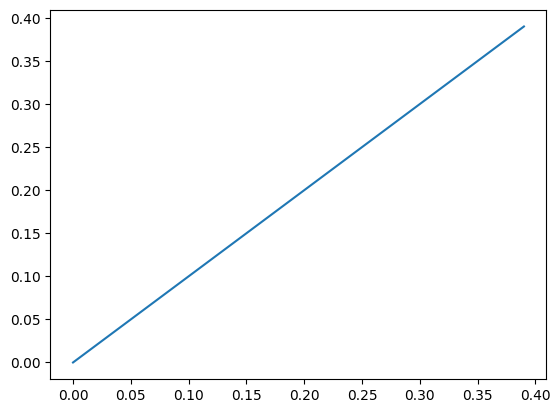

In [91]:
import matplotlib.pyplot as plt


def poly_func(x, poly_coefs):
    out = np.zeros_like(x)
    # skip offset
    for k in range(poly_coefs.shape[0] - 1):
        out += (x ** (k + 1)) * (poly_coefs[k + 1])
    return out

x = np.arange(0,0.4,0.01)
a = [0]*5

# a = [ 0.0000, -0.0330, -0.0279, -0.0081, -0.0021] # film
# a = [0.0000, 0.0779, 0.0294, 0.0066, 0.0015] # chameleon
# a = [0.0000, 0.2397, 0.2365, 0.2291, 0.2168] # cora
# a = [ 0.0000, 30.9898, 26.9427, 21.4760, 17.4812]
# a = [ 0.0000, 34.3352, 30.4187, 25.5207, 21.1020]
a = [0., 1., 0., 0., 0.]
poly_coefs = np.array(a)
y = poly_func(x, poly_coefs)

plt.plot(x,y)

In [1]:
import numpy as np 
import scipy.sparse as sp

In [3]:
a = np.array([1,3,0,0,0,1,2])
b = sp.csr_array(a)

In [7]:
b.todense()

array([[1, 3, 0, 0, 0, 1, 2]])

In [16]:
def mat_to_bytes(nrows, ncols, dtype=32, out="GB"):
    """Calculate the size of a numpy array in bytes.
        :param nrows: the number of rows of the matrix.
        :param ncols: the number of columns of the matrix.
        :param dtype: the size of each element in the matrix. Defaults to 32bits.
        :param out: the output unit. Defaults to gigabytes (GB)
        :returns: the size of the matrix in the given unit
        :rtype: a float
        """
    sizes = {v: i for i, v in enumerate("BYTES KB MB GB TB".split())}
    return nrows * ncols * dtype / 8 / 1024. ** sizes[out]

mat_to_bytes(5000, 169343, 32, "GB") 


3.1542591750621796

In [1]:
import pickle 


filepath = "/home/xingzguo/projects_data/DynMixer/ogbn-products/raw_data/raw_node_label.pkl"
with open(filepath,'rb') as f:
    lbs = pickle.load(f)

In [13]:
import numpy as np  
lb_arr = []
t_lim = 60_000_000
for (key, arr, t) in lbs:
    if t > t_lim:
        break
    lb_arr.append(arr)
lb_arr = np.array(lb_arr, dtype=bool)
print (lb_arr.shape)


(2379138, 47)


In [14]:
lb_arr.sum(axis = 0)

array([111581, 107886, 111829, 142459, 644135,  40146, 156729, 168462,
       108965,  65798,  51221,  28783, 130017,  99269,   3023,  26713,
        82134,  41695,  47918,  17095,  22227,  79935,    856,   3576,
        43344,   2994,    542,    253,   1822,   1475,    233,    410,
          506,     29,    153,     43,    610,    510,     91,     37,
            2,     59,  31690,   1321,    552,      9,      1])

In [15]:
(lb_arr.sum(axis = 1) !=0).sum()

2379138

In [17]:
lb_arr.sum(axis = 0)

array([111581, 107886, 111829, 142459, 644135,  40146, 156729, 168462,
       108965,  65798,  51221,  28783, 130017,  99269,   3023,  26713,
        82134,  41695,  47918,  17095,  22227,  79935,    856,   3576,
        43344,   2994,    542,    253,   1822,   1475,    233,    410,
          506,     29,    153,     43,    610,    510,     91,     37,
            2,     59,  31690,   1321,    552,      9,      1])

In [32]:
import numpy as np 

def simulate_additive_noise(
    original_feat_mat: np.ndarray,
    snapshot_id,
    total_snapshot,
    base_original_sign: float = 0.4,
):
    # Simulate
    # number of features
    original_feat = np.copy(original_feat_mat)
    num_row, num_col = original_feat.shape
    origin_p = base_original_sign + (1 - base_original_sign) * (
        snapshot_id
    ) / (total_snapshot - 1)
    noise_p = 1.0 - origin_p
    mu = np.mean(original_feat, axis=1)
    print (mu)
    nnz_ids = ~np.isnan(mu)
    # print(nnz_ids)
    mu_nnz = np.mean(original_feat[nnz_ids])
    std_nnz = np.std(original_feat[nnz_ids])
    # print(mu_nnz, std_nnz )
    noise_mat = np.random.normal(mu_nnz, std_nnz, (nnz_ids.sum(), num_col))
    original_feat[nnz_ids] = origin_p*original_feat[nnz_ids] + noise_p*noise_mat

    # print(snapshot_id, total_snapshot, origin_p, noise_p)
    return original_feat

original_feat_mat = np.array(
    [
        [np.nan,np.nan,np.nan],
        [0,0,0],
        [1,0,1],
    ], dtype=np.float
)

simulate_additive_noise(original_feat_mat,3,4)


[       nan 0.         0.66666667]


/tmp/ipykernel_2701/3254348246.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ], dtype=np.float


array([[nan, nan, nan],
       [ 0.,  0.,  0.],
       [ 1.,  0.,  1.]])

In [49]:
import numpy as np 
import torch_geometric.transforms as T
import torch_geometric
import torch
import os
from typing import Any, Callable, List, Optional, Tuple

from torch_geometric.data import (
    Data,
    InMemoryDataset,
    download_url,
    extract_zip,
)


from typing import Any, Callable, Optional, Tuple
from torch_geometric.datasets import EllipticBitcoinDataset


class EllipticBitcoinTempDataset(InMemoryDataset):
    r"""The Elliptic Bitcoin dataset of Bitcoin transactions from the
    `"Anti-Money Laundering in Bitcoin: Experimenting with Graph Convolutional
    Networks for Financial Forensics" <https://arxiv.org/abs/1908.02591>`_
    paper.


        * - #nodes
          - #edges
          - #features
          - #classes
        * - 203,769
          - 234,355
          - 165
          - 2
    """
    url = 'https://data.pyg.org/datasets/elliptic'

    def __init__(self, root: str, transform: Optional[Callable] = None,
                 pre_transform: Optional[Callable] = None):
        super().__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self) -> List[str]:
        return [
            'elliptic_txs_features.csv',
            'elliptic_txs_edgelist.csv',
            'elliptic_txs_classes.csv',
        ]

    @property
    def processed_file_names(self) -> str:
        return 'data.pt'

    def download(self):
        for file_name in self.raw_file_names:
            path = download_url(f'{self.url}/{file_name}.zip', self.raw_dir)
            extract_zip(path, self.raw_dir)
            os.remove(path)

    def _process_df(self, feat_df: Any, edge_df: Any,
                    class_df: Any) -> Tuple[Any, Any, Any]:
        
        print('test', feat_df )
        
        return feat_df, edge_df, class_df

    def process(self):
        import pandas as pd

        feat_df = pd.read_csv(self.raw_paths[0], header=None)
        edge_df = pd.read_csv(self.raw_paths[1])
        class_df = pd.read_csv(self.raw_paths[2])

        columns = {0: 'txId', 1: 'time_step'}
        feat_df = feat_df.rename(columns=columns)

        feat_df, edge_df, class_df = self._process_df(
            feat_df,
            edge_df,
            class_df,
        )

        x = torch.from_numpy(feat_df.loc[:, 2:].values).to(torch.float)

        # There exists 3 different classes in the dataset:
        # 0=licit,  1=illicit, 2=unknown
        mapping = {'unknown': 2, '1': 1, '2': 0}
        class_df['class'] = class_df['class'].map(mapping)
        y = torch.from_numpy(class_df['class'].values)

        mapping = {idx: i for i, idx in enumerate(feat_df['txId'].values)}
        edge_df['txId1'] = edge_df['txId1'].map(mapping)
        edge_df['txId2'] = edge_df['txId2'].map(mapping)
        # edge_df should sort
        edge_index = torch.from_numpy(edge_df.values).t().contiguous()
        

        # Timestamp based split:
        # train_mask: 1 - 34 time_step, test_mask: 35-49 time_step
        time_step = torch.from_numpy(feat_df['time_step'].values)
        train_mask = (time_step < 35) & (y != 2)
        test_mask = (time_step >= 35) & (y != 2)

        data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask,
                    test_mask=test_mask)

        if self.pre_transform is not None:
            data = self.pre_transform(data)

        torch.save(self.collate([data]), self.processed_paths[0])

    @property
    def num_classes(self) -> int:
        return 2
    

In [51]:

dataset_pyg = EllipticBitcoinTempDataset(
    root = './',
)

edge_list = dataset_pyg[0].edge_index.numpy().astype(np.int32)
# print('edge-list', edge_list.shape)
print('feature', dataset_pyg[0].x.shape)
print('label', dataset_pyg[0].y)
print(np.min(edge_list), np.max(edge_list)) # index from zero
print(edge_list)




feature torch.Size([203769, 165])
label tensor([2, 2, 2,  ..., 1, 2, 2])
0 203768
[[     0      2      4 ... 201921 201480 201954]
 [     1      3      5 ... 202042 201368 201756]]
